You should consider upgrading via the '/Users/A297958/PycharmProjects/CAP_exchange_index_checker /venv/bin/python -m pip install --upgrade pip' command.


/var/folders/j7/xp4cpcm53m507vbxq4gfg3l80000gq/T/ipykernel_2771/1752594820.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


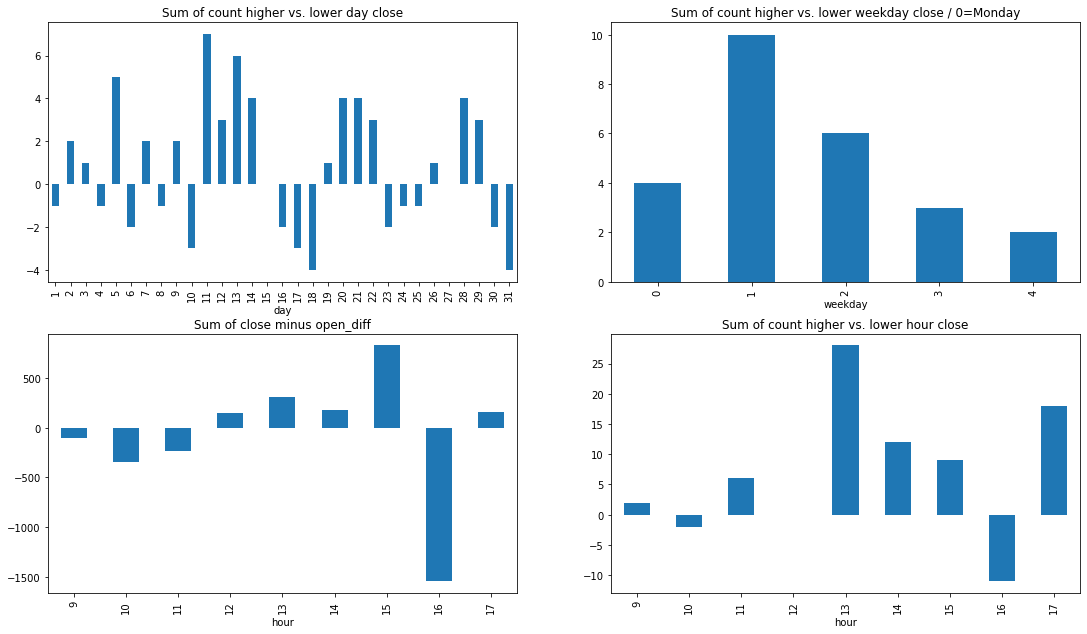

In [2]:
#Supress default INFO logging

!pip install yfinance | grep -v 'already satisfied'

import numpy as np
import pandas as pd
from pandas import datetime
import yfinance as yf
import matplotlib.pyplot as plt


def datetransformer(df):

  df = hist.reset_index()
  df.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)

  try:
    df.rename(columns={"Date": "Datetime"}, inplace=True)
  except:
    pass


  df['date'] = pd.DatetimeIndex(df['Datetime']).date
  df['time'] = pd.DatetimeIndex(df['Datetime']).time
  df['day'] = pd.DatetimeIndex(df['Datetime']).day
  df['month'] = pd.DatetimeIndex(df['Datetime']).month
  df['hour'] = pd.DatetimeIndex(df['Datetime']).hour
  df['weekday'] = pd.DatetimeIndex(df['Datetime']).weekday

  df['higher_close'] = df['Open'].lt(df['Close'])
  df['close-open_diff'] = df['Close'] - df['Open']
  df['high-low_diff'] = df['High'] - df['Low']
  return df

ticker = yf.Ticker("^GDAXI")

hist = ticker.history(period="12mo",interval="60m")
df = datetransformer(hist)

hist = ticker.history(period="12mo",interval="1d")
dfday = datetransformer(hist)

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(18.5, 10.5)


df_tmp = dfday.groupby('day')['close-open_diff'].apply(lambda x: pd.Series([(x < 0).sum(), (x >= 0).sum()])).unstack().rename(columns={0:"lower then day start", 1:"higher then day start"})
df_tmp['higher'] = df_tmp['higher then day start'] - df_tmp['lower then day start']
df_tmp.higher.plot(ax=axes[0,0], kind="bar").title.set_text('Sum of count higher vs. lower day close')

df_tmp = dfday.groupby('weekday')['close-open_diff'].apply(lambda x: pd.Series([(x < 0).sum(), (x >= 0).sum()])).unstack().rename(columns={0:"lower then weekday start", 1:"higher then weekday start"})
df_tmp['higher'] = df_tmp['higher then weekday start'] - df_tmp['lower then weekday start']
df_tmp.higher.plot(ax=axes[0,1], kind="bar").title.set_text('Sum of count higher vs. lower weekday close / 0=Monday')

df.groupby(['hour'])['close-open_diff'].sum().plot(ax=axes[1,0], kind='bar').title.set_text('Sum of close minus open_diff')

df_tmp = df.groupby('hour')['close-open_diff'].apply(lambda x: pd.Series([(x < 0).sum(), (x >= 0).sum()])).unstack().rename(columns={0:"lower then hour start", 1:"higher then hour start"})
df_tmp['higher'] = df_tmp['higher then hour start'] - df_tmp['lower then hour start']
df_tmp.higher.plot(ax=axes[1,1], kind='bar').title.set_text('Sum of count higher vs. lower hour close')